In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os
# This is to avoid OMP_NUM_THREADS warning in K Means clustering 
os.environ["OMP_NUM_THREADS"] = '1'



In [3]:
os.chdir ('C:\\Noble\\Training\\KODO\\2025\Dec 2025\\Dec 2025 Day 10\\')

In [4]:
data = pd.read_csv('movie_metadata.csv')
display(data)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000
1,Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0
2,Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000
3,Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,...,2701,English,USA,PG-13,250000000,2012,23000,8.5,2.35,164000
4,49,Doug Walker,49,49,131,49,Rob Walker,131,49,Documentary,...,49,49,49,49,49,49,12,7.1,49.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1,87,2,318,Daphne Zuniga,637,49,Comedy|Drama,...,6,English,Canada,49,49,2013,470,7.7,49.00,84
5039,Color,49,43,43,49,319,Valorie Curry,841,49,Crime|Drama|Mystery|Thriller,...,359,English,USA,TV-14,49,49,593,7.5,16.00,32000
5040,Color,Benjamin Roberds,13,76,0,0,Maxwell Moody,0,49,Drama|Horror|Thriller,...,3,English,USA,49,1400,2013,0,6.3,49.00,16
5041,Color,Daniel Hsia,14,100,0,489,Daniel Henney,946,10443,Comedy|Drama|Romance,...,9,English,USA,PG-13,49,2012,719,6.3,2.35,660


In [5]:
print (data.shape)

(5043, 28)


In [6]:

display (data['country'].value_counts().head(50))


country
USA               3807
UK                 448
France             154
Canada             126
Germany             97
Australia           55
India               34
Spain               33
China               30
Japan               23
Italy               23
Hong Kong           17
Mexico              17
New Zealand         15
South Korea         14
Ireland             12
Russia              11
Denmark             11
South Africa         8
Norway               8
Brazil               8
Sweden               6
Thailand             5
49                   5
Netherlands          5
Poland               5
Argentina            4
Israel               4
Iran                 4
Belgium              4
Romania              4
Switzerland          3
Czech Republic       3
West Germany         3
Iceland              3
Taiwan               2
Hungary              2
Greece               2
New Line             1
Soviet Union         1
Aruba                1
Libya                1
Chile                1
Per

In [7]:
display (data['language'].value_counts())

language
English       4704
French          73
Spanish         40
Hindi           28
Mandarin        26
German          19
Japanese        18
49              12
Cantonese       11
Italian         11
Russian         11
Korean           8
Portuguese       8
Danish           5
Swedish          5
Hebrew           5
Arabic           5
Polish           4
Persian          4
Norwegian        4
Dutch            4
Chinese          3
Thai             3
Indonesian       2
Romanian         2
Zulu             2
Dari             2
Icelandic        2
Aboriginal       2
Filipino         1
Maya             1
Kazakh           1
Telugu           1
Aramaic          1
Mongolian        1
Bosnian          1
Hungarian        1
Kannada          1
Czech            1
Dzongkha         1
Tamil            1
Panjabi          1
Vietnamese       1
Urdu             1
Slovenian        1
Greek            1
Swahili          1
Name: count, dtype: int64

In [8]:

display (data.columns)



Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [9]:
display (data[['director_name','director_facebook_likes','actor_3_facebook_likes','actor_3_name' ]])

,director_name,director_facebook_likes,actor_3_facebook_likes,actor_3_name
0,James Cameron,0,855,Wes Studi
1,Gore Verbinski,563,1000,Jack Davenport
2,Sam Mendes,0,161,Stephanie Sigman
3,Christopher Nolan,22000,23000,Joseph Gordon-Levitt
4,Doug Walker,131,49,49
...,...,...,...,...
5038,Scott Smith,2,318,Crystal Lowe
5039,49,49,319,Sam Underwood
5040,Benjamin Roberds,0,0,David Chandler
5041,Daniel Hsia,0,489,Eliza Coupe


In [10]:
newdata=data.iloc[:,4:6]
display (newdata)


,director_facebook_likes,actor_3_facebook_likes
0,0,855
1,563,1000
2,0,161
3,22000,23000
4,131,49
...,...,...
5038,2,318
5039,49,319
5040,0,0
5041,0,489


In [12]:
from sklearn. cluster import KMeans
kmeans = KMeans(n_clusters=5,n_init =10)
kmeans.fit(newdata)
print (kmeans)


KMeans(n_clusters=5, n_init=10)


In [13]:
display (kmeans.cluster_centers_)

array([[  151.29382199,   420.67350785],
       [12490.38461538,   605.93269231],
       [  210.77011494, 11126.43678161],
       [17621.21212121,   596.10606061],
       [17545.45454545, 14545.45454545]])

In [14]:
print (kmeans.labels_)

[0 0 0 ... 0 0 0]


In [15]:
cluster = pd.concat([data,pd.DataFrame(kmeans.labels_, columns = ['Cluster Number'])],axis=1)
print (len(kmeans.labels_))
cluster.to_excel ('22_Dec_moviecluster.xlsx')
display (cluster)


5043


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Cluster Number
0,Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000,0
1,Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0,0
2,Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,...,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000,0
3,Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,...,English,USA,PG-13,250000000,2012,23000,8.5,2.35,164000,4
4,49,Doug Walker,49,49,131,49,Rob Walker,131,49,Documentary,...,49,49,49,49,49,12,7.1,49.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1,87,2,318,Daphne Zuniga,637,49,Comedy|Drama,...,English,Canada,49,49,2013,470,7.7,49.00,84,0
5039,Color,49,43,43,49,319,Valorie Curry,841,49,Crime|Drama|Mystery|Thriller,...,English,USA,TV-14,49,49,593,7.5,16.00,32000,0
5040,Color,Benjamin Roberds,13,76,0,0,Maxwell Moody,0,49,Drama|Horror|Thriller,...,English,USA,49,1400,2013,0,6.3,49.00,16,0
5041,Color,Daniel Hsia,14,100,0,489,Daniel Henney,946,10443,Comedy|Drama|Romance,...,English,USA,PG-13,49,2012,719,6.3,2.35,660,0


In [16]:

print (type(kmeans.labels_))
display (pd.DataFrame(kmeans.labels_).value_counts())


<class 'numpy.ndarray'>


0
0    4775
1     104
2      87
3      66
4      11
Name: count, dtype: int64

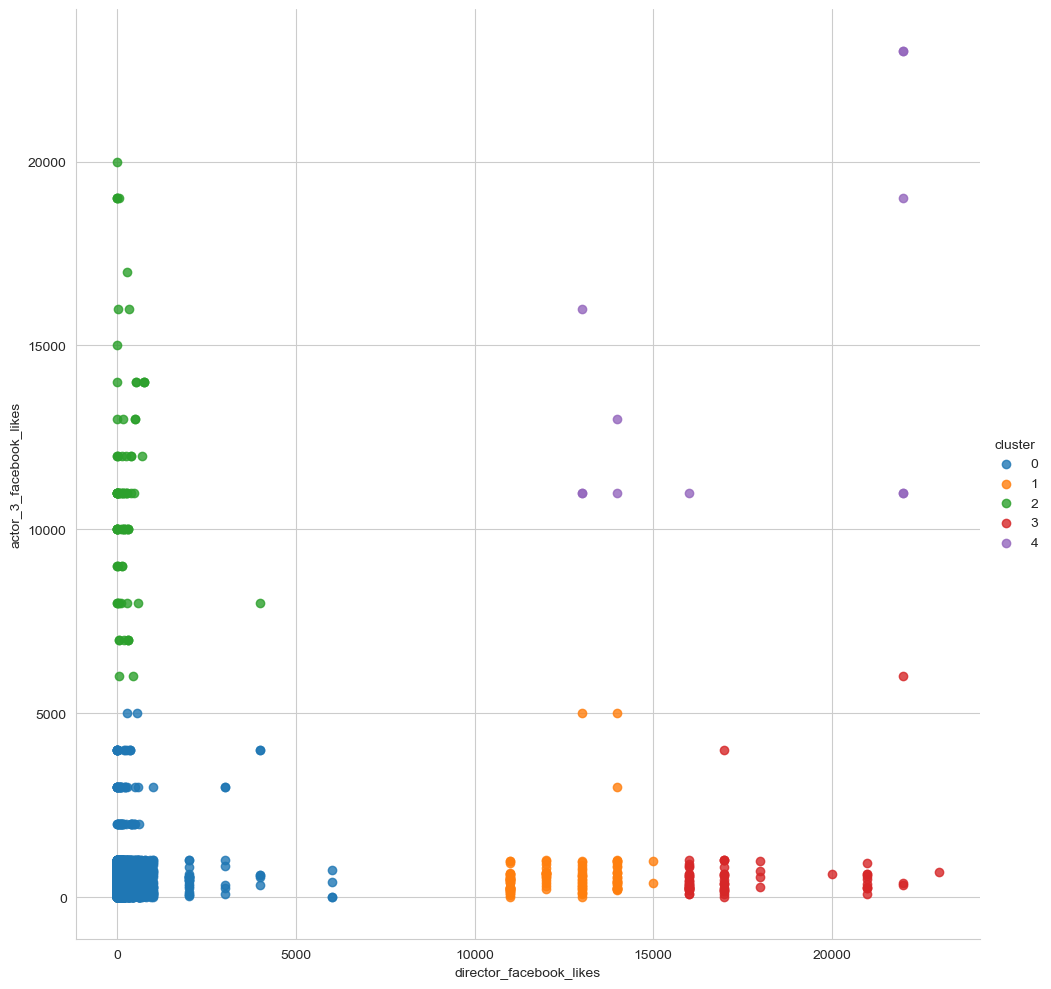

In [17]:
import colorcet as cc # LM plot circle colour 
newdata['cluster'] = kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot(x= 'director_facebook_likes',y = 'actor_3_facebook_likes',data=newdata, hue='cluster',height=10,aspect=1,fit_reg=False)
plt.show()


In [18]:

display (kmeans.cluster_centers_)


array([[  151.29382199,   420.67350785],
       [12490.38461538,   605.93269231],
       [  210.77011494, 11126.43678161],
       [17621.21212121,   596.10606061],
       [17545.45454545, 14545.45454545]])

In [19]:
newdata

,director_facebook_likes,actor_3_facebook_likes,cluster
0,0,855,0
1,563,1000,0
2,0,161,0
3,22000,23000,4
4,131,49,0
...,...,...,...
5038,2,318,0
5039,49,319,0
5040,0,0,0
5041,0,489,0


0
6    2879
0    1853
1     102
2      70
4      68
7      51
3      11
5       9
Name: count, dtype: int64

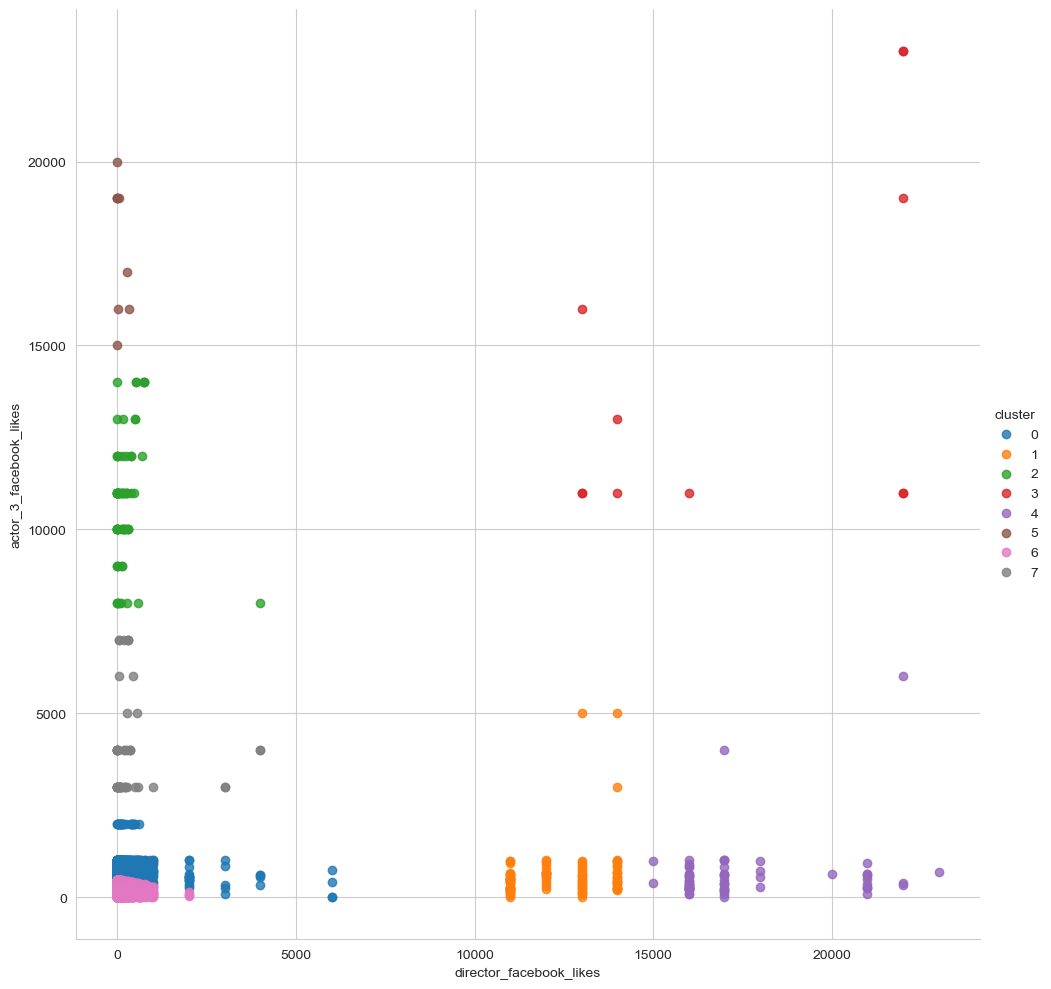

In [20]:

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8,n_init =100)
kmeans.fit(newdata)
display (pd.DataFrame(kmeans.labels_).value_counts())
newdata['cluster'] = kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot(x= 'director_facebook_likes',y = 'actor_3_facebook_likes',data=newdata, hue='cluster',   height=10,aspect=1,fit_reg=False)
plt.show()


0
0    2784
9    1948
4     102
3      64
1      53
2      51
7      15
6      15
5       8
8       3
Name: count, dtype: int64

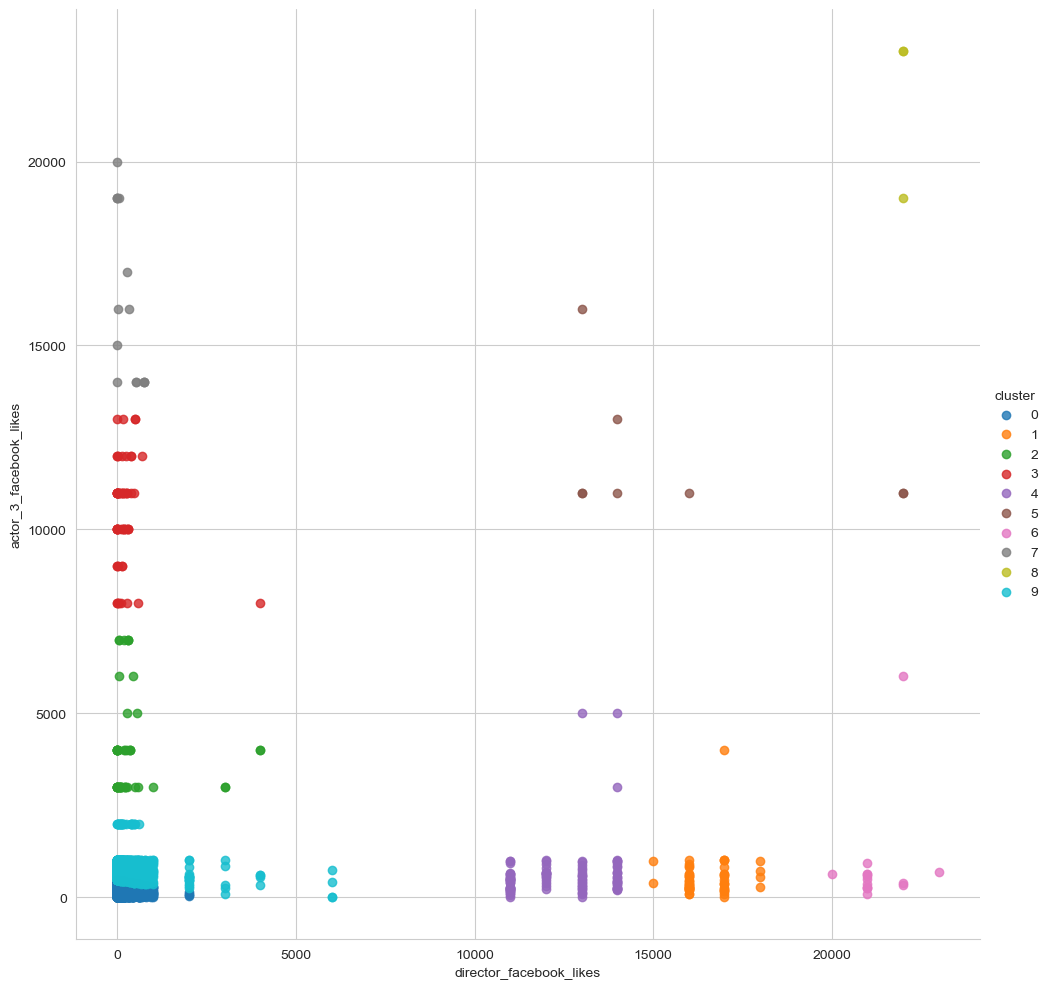

In [21]:

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10,n_init =100)
kmeans.fit(newdata)
display (pd.DataFrame(kmeans.labels_).value_counts())
newdata['cluster'] = kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot(x= 'director_facebook_likes',y = 'actor_3_facebook_likes',data=newdata, hue='cluster',   height=10,aspect=1,fit_reg=False)
plt.show()


0
0    4775
1     180
2      88
Name: count, dtype: int64

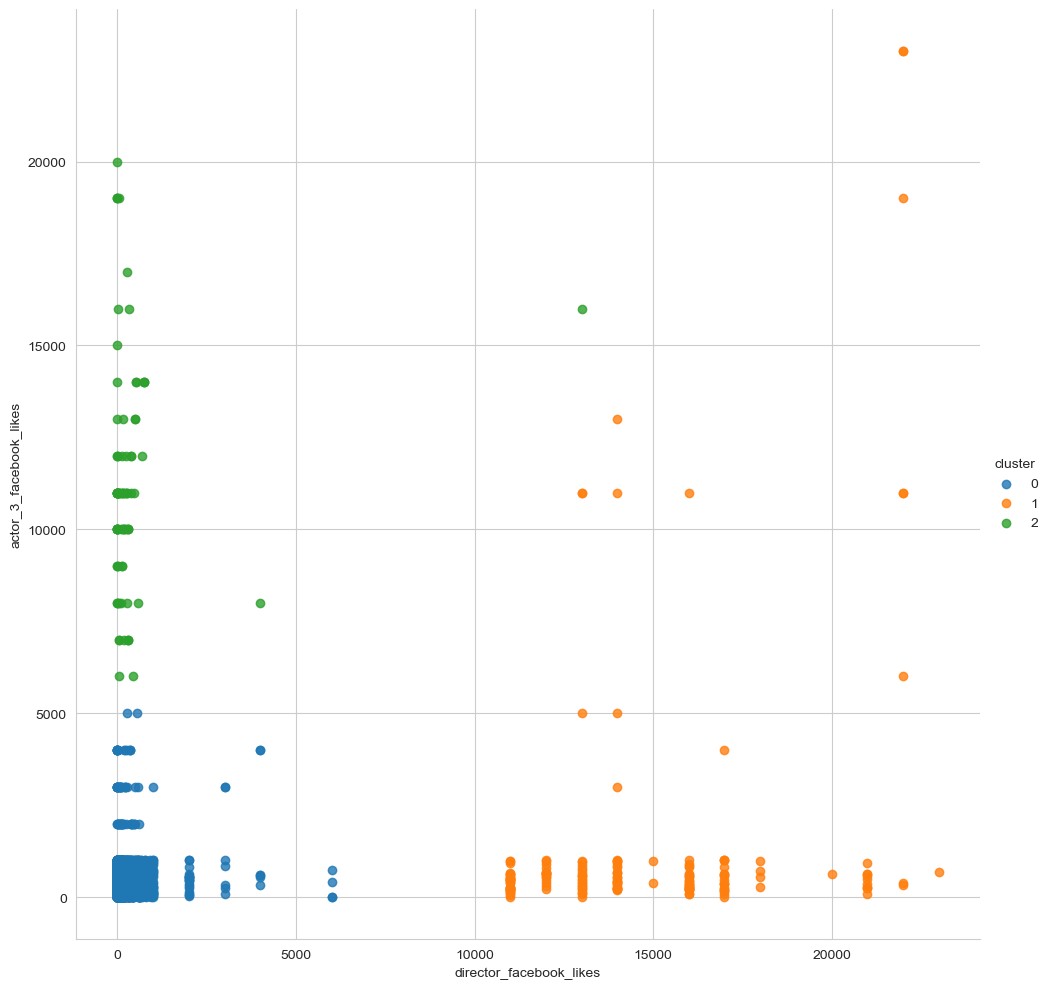

In [22]:

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,n_init =100)
kmeans.fit(newdata)
display (pd.DataFrame(kmeans.labels_).value_counts())
newdata['cluster'] = kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot(x= 'director_facebook_likes',y = 'actor_3_facebook_likes',data=newdata, hue='cluster',   height=10,aspect=1,fit_reg=False)
plt.show()


0
0    4862
1     181
Name: count, dtype: int64

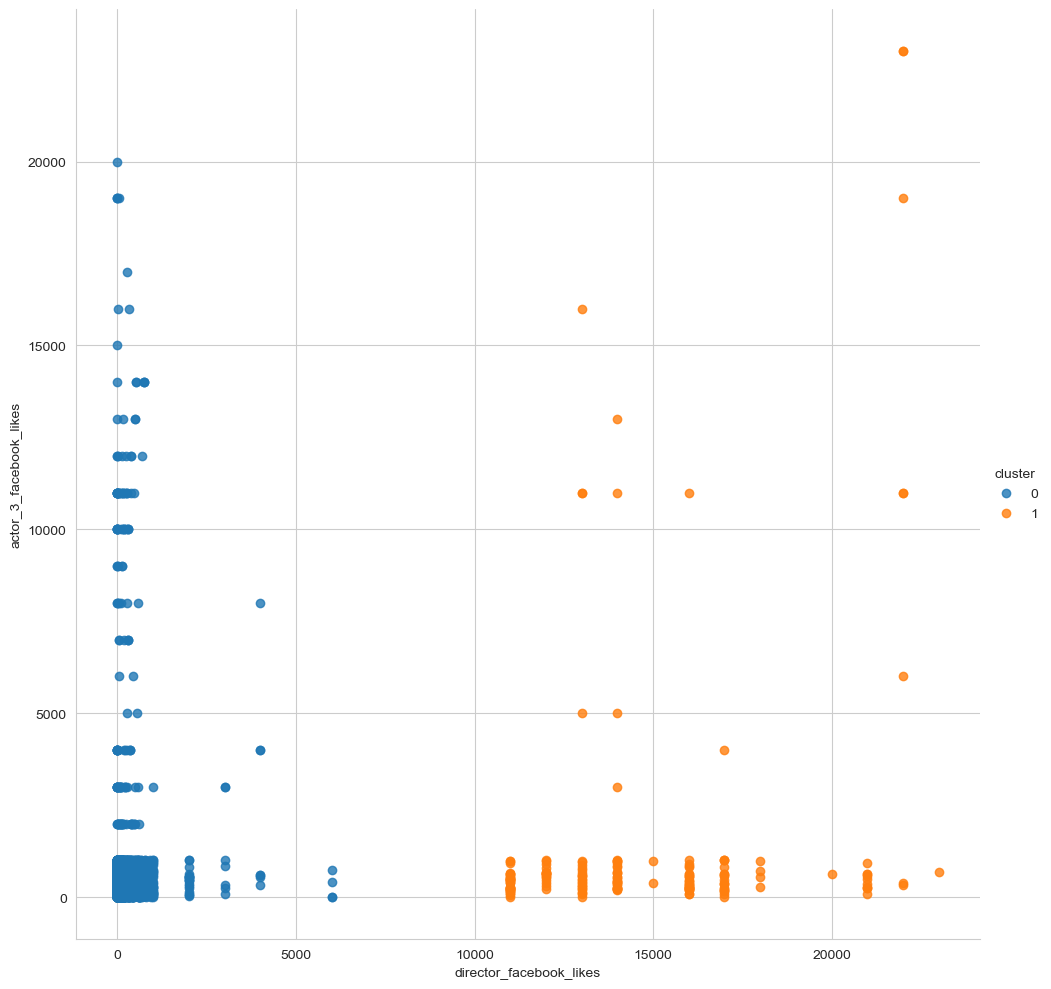

In [23]:

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2,n_init =100)
kmeans.fit(newdata)
display (pd.DataFrame(kmeans.labels_).value_counts())
newdata['cluster'] = kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot(x= 'director_facebook_likes',y = 'actor_3_facebook_likes',data=newdata, hue='cluster',   height=10,aspect=1,fit_reg=False)
plt.show()
